<a href="https://colab.research.google.com/github/SahilD95/UberData/blob/main/UberDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload files from your local system
from google.colab import files
uploaded = files.upload()

Saving UberDataset.csv to UberDataset (1).csv


In [ ]:
# Load the uploaded file into pandas
df = pd.read_csv("UberDataset.csv")

# Show the first 5 rows
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df['PURPOSE'].fillna("NOT", inplace=True)

/tmp/ipython-input-1469337574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [ ]:
# Load the uploaded file into pandas
df = pd.read_csv("UberDataset.csv")

df['PURPOSE'].fillna("NOT", inplace=True)

/tmp/ipython-input-819854584.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],
                                                                        errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],
                                                                        errors='coerce')

In [ ]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                                                        bins = [0,10,15,19,24],
                                                        labels = ['Morning','Afternoon','Evening','Night'])

In [ ]:
# Load the uploaded file into pandas again to ensure df is a DataFrame
df = pd.read_csv("UberDataset.csv")

# Convert date columns to datetime objects
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Display the info to confirm the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                                                        bins = [0,10,15,19,24],
                                                        labels = ['Morning','Afternoon','Evening','Night'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 1, 'START': 69, 'STOP': 74, 'PURPOSE': 6, 'date': 85}

In [ ]:
df.head()

,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,CATEGORY_Business,PURPOSE_Between Offices,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Temporary Site,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Jan,Fri
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Jan,Wed
5,2016-01-06 17:15:00,2016-01-06 17:19:00,West Palm Beach,West Palm Beach,4.3,2016-01-06,17.0,Evening,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Jan,Wed


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

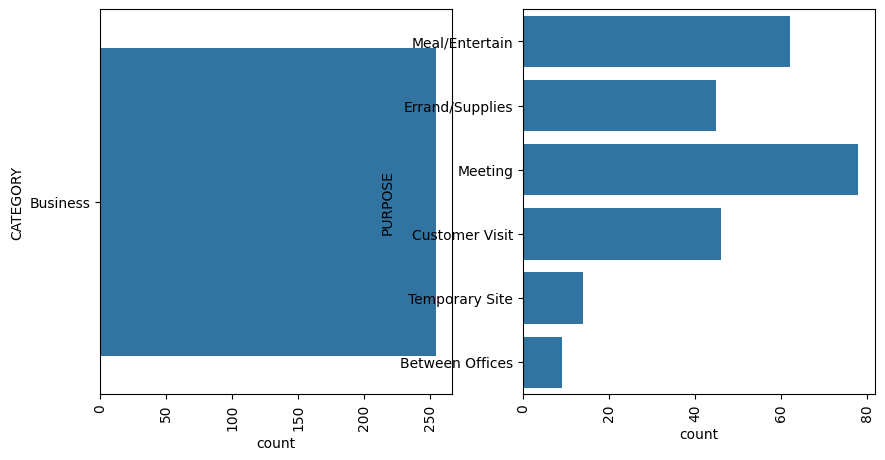

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.xticks(rotation=90)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

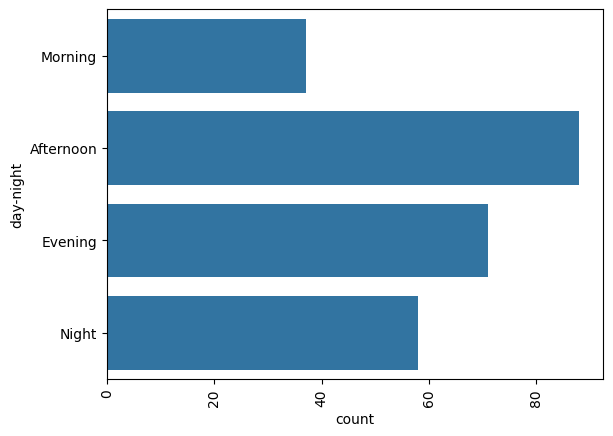

In [ ]:
sns.countplot(df['day-night'])
plt.xticks(rotation=90)

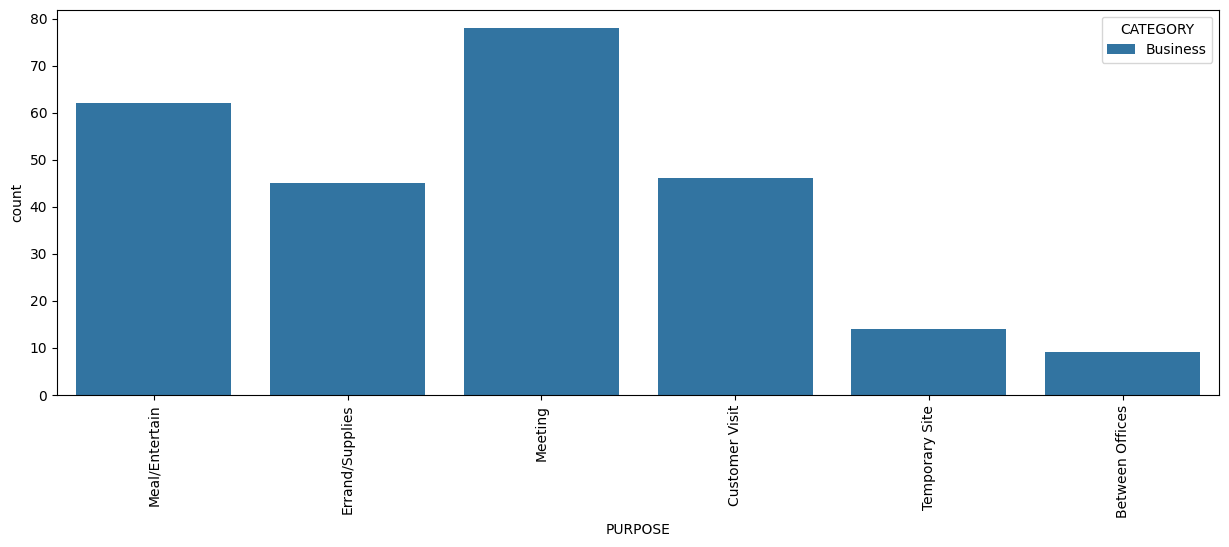

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]).toarray())
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

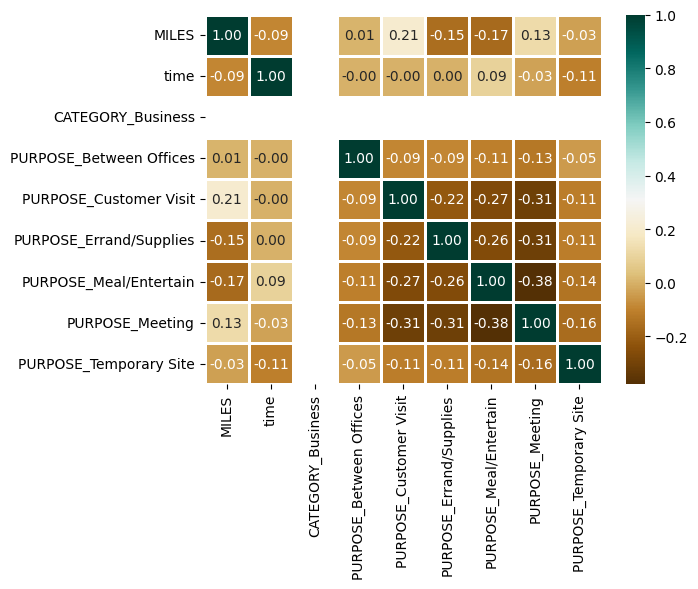

In [ ]:
# Select only numerical columns for correlation calculation
numeric_dataset = df.select_dtypes(include=['number'])

# Now you can create the heatmap
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

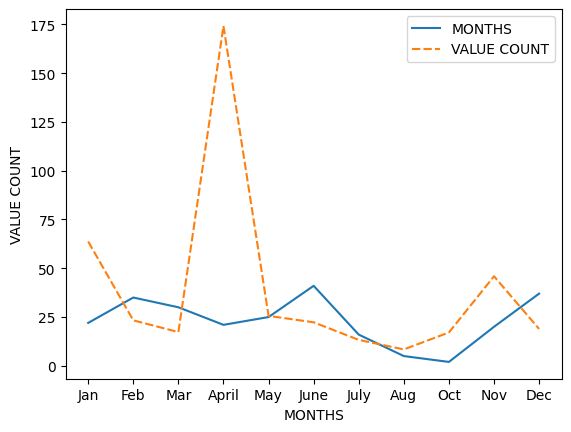

In [ ]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
                        5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
                        9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df_monthly = pd.DataFrame({"MONTHS": mon.values,
                                "VALUE COUNT": df.groupby('MONTH',
                                                                                                sort=False)['MILES'].max()})

p = sns.lineplot(data=df_monthly)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [ ]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
        0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

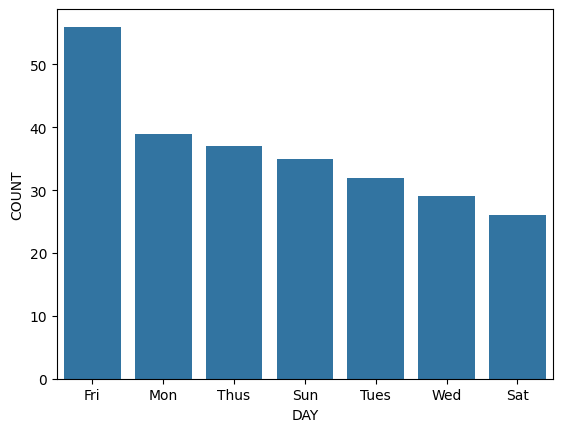

In [ ]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

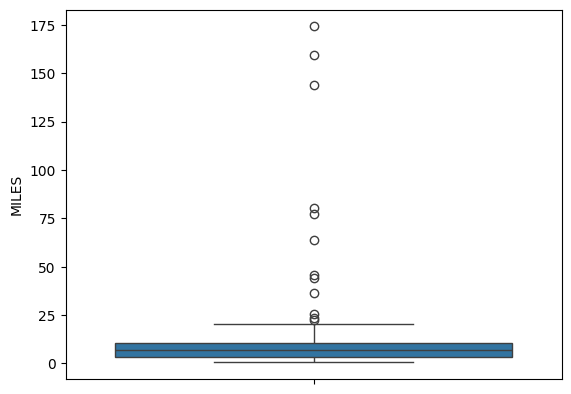

In [ ]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

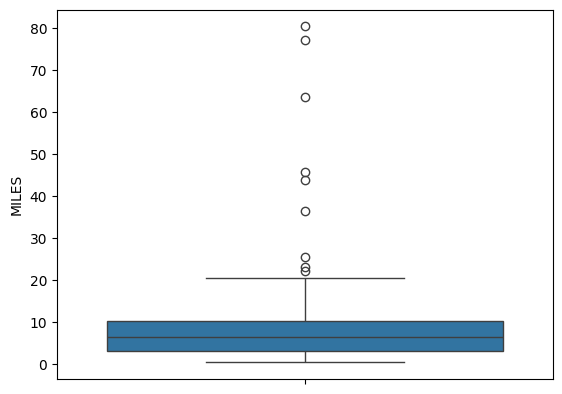

In [ ]:
sns.boxplot(df[df['MILES']<100]['MILES'])

/tmp/ipython-input-1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

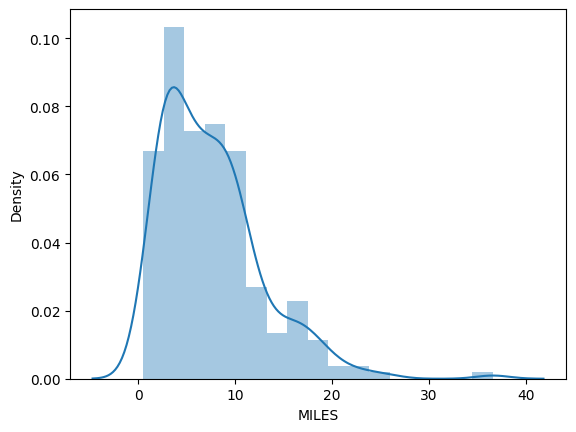

In [ ]:
sns.distplot(df[df['MILES']<40]['MILES'])